# Statistical Magic
This notebook does some statistical operations to prove things like confidence intervals, standard errors and much more.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd



# Create some random data

In [11]:
# Create some random data points from a gaussian distribution
#Set random seed
np.random.seed(42)
mean = 100
std = 5
n = 10000
data = np.random.normal(mean, std, n)


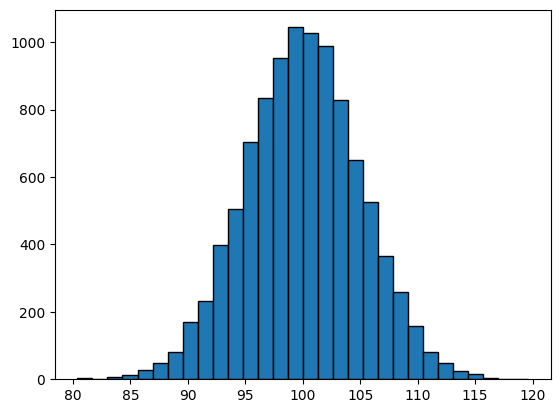

In [12]:
#plot
plt.hist(data, bins=30, edgecolor='black');

# Population statistics
Lets find out the actual population mean and standard deviation

In [25]:
population_mean = np.mean(data)
population_std = np.std(data)
print(f"Population mean: {population_mean}")
print(f"Population standard deviation: {population_std}")

Population mean: 99.98932008315786
Population standard deviation: 5.017061030649938


# Sample random points
Simulate an experiment to see what we get

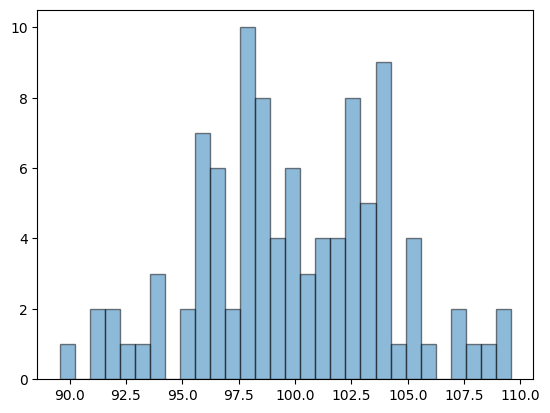

In [15]:
# Random sample
X = np.random.choice(data, 100, replace=False)

#Plot it
plt.hist(X, bins=30, edgecolor='black', alpha=0.5);

In [16]:
# Calculate sample mean and standard deviation
mean_sample = np.mean(X)
std_sample = np.std(X)
print(f'Mean: {mean_sample}, Standard deviation: {std_sample}')

Mean: 99.91165716452228, Standard deviation: 4.2291960636950545


# Standard Error of the Mean SEM, or simply SE

SE = stdOfPopulation/sqrt(samples)

SE is the standard deviation of the sample means. We will actually need the std of the population for this, which is seldom known. However the std of a large sample is usually a good approximation of this. If the underlying distribution is skewed it is worse as an estimate, but will still be better with more samples.

We can use SE to create confidence intervals of a (single) sample.

# Confidence intervals
What is the confidence interval that we are say 95% sure that the actual mean is within some range?

In [17]:
# Calculate the standard error
se = std_sample/np.sqrt(len(X))
print(f'Standard error: {se}')

# Calculate the 95% confidence interval
ci = 1.96*se
print(f'Confidence interval: {ci}')

# Calculate the confidence interval
ci_low = mean_sample - ci
ci_high = mean_sample + ci
print(f'Confidence interval: [{ci_low}, {ci_high}]')
 

Standard error: 0.42291960636950543
Confidence interval: 0.8289224284842306
Confidence interval: [99.08273473603805, 100.74057959300652]


# Central limit theorem

Lets try the central limit theorem

1) The means of the samples in a set of samples will be approximately normally distributed
2) This normal distribution will have a mean close to the mean fo the population
3) The variance of the sample means will be close to the variance of the population divided by the sample size


Mean of sample means: 99.98905812234348, Standard deviation of sample means: 0.5025830796304259, Standard error of the mean: 0.5017061030649937
Population mean: 99.98932008315786, Population standard deviation: 5.017061030649938


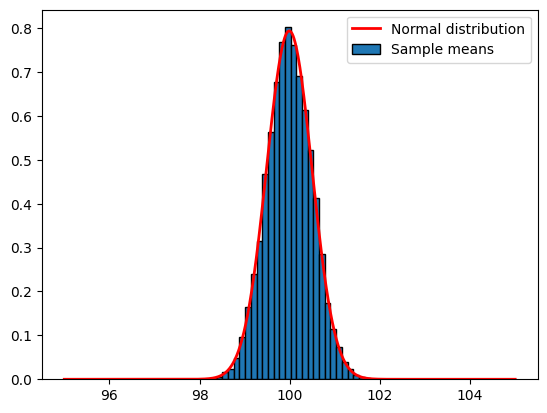

In [41]:
sample_size = 100
n_trials = 20000
sample_means = []
sample_stds = []
for trial in range(n_trials):
    X = np.random.choice(data, sample_size, replace=True)
    mean_sample = np.mean(X)
    std_sample = np.std(X)
    sample_means.append(mean_sample)
    sample_stds.append(std_sample)


means_of_samples = np.mean(sample_means)
stds_of_samples = np.std(sample_means)
se = population_std/np.sqrt(sample_size)
print(f'Mean of sample means: {means_of_samples}, Standard deviation of sample means: {stds_of_samples}, Standard error of the mean: {se}')
print(f'Population mean: {population_mean}, Population standard deviation: {population_std}')
plt.hist(sample_means, bins=30, edgecolor='black', density=True);
x_norm = np.linspace(95, 105, 1000)
y_norm = (1/(stds_of_samples*np.sqrt(2*np.pi)))*np.exp(-0.5*((x_norm-means_of_samples)/stds_of_samples)**2)
plt.plot(x_norm, y_norm, 'r-', lw=2)

plt.legend(['Normal distribution', 'Sample means'])




In [40]:
np.mean(sample_stds)

4.981858598747152

In [37]:
#var_of_sample_means = var_real/sqrt(n)
#std_of_sample_means = sqrt(var_real)/sqrt(n)

standard_error = np.std(sample_means)/np.sqrt(sample_size)
#estimated_std = 

print(f'True mean: {mean}, True standard deviation: {std}')
print(f'Calculated mean: {np.mean(sample_means)}, Calculated standard deviation (Standard Error): {standard_error}')

True mean: 100, True standard deviation: 5
Calculated mean: 99.98823200260382, Calculated standard deviation (Standard Error): 0.05002339856138521


# Test how good our confidence intervals are

If we want to have our mean within the actual population mean with 95% probability, we need to have 1.96 standard deviations.
Lets see if it works

In [48]:
sample_size = 200
n_trials = 20000
num_outside_confidece_interval = 0
num_inside_confidece_interval = 0
for trial in range(n_trials):
    X = np.random.choice(data, sample_size, replace=True)
    mean_sample = np.mean(X)
    std_sample = np.std(X)
    SE = std_sample/np.sqrt(sample_size)

    if np.abs(mean_sample - population_mean) > 1.96*SE: 
        # Trial is outside the confidence interval
        num_outside_confidece_interval += 1
    else:
        num_inside_confidece_interval += 1

print(f'Fraction of trials outside the confidence interval: {num_outside_confidece_interval/n_trials}')



Fraction of trials outside the confidence interval: 0.05125
